**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Fall 2021; Prof. V. F. de Almeida

# Title
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  `your name(s)` <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor and Collaborator:** `Prof. name`

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**22Nov2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
   - [Test 1](#1dsolofueldirichlet)
   - [Test 2](#1dsolofueldirichletrobin)
* [2-D Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

`text goes here`

## [Problem Statement](#toc)<a id="problem"></a>

`mathematical statement of problem`


### Domain
`describe domain`

## [Objectives](#toc)<a id="obj"></a>

`state objectives`

## [Approach](#toc)<a id="app"></a>

A Galerkin weak formulation follows below and the implementation of the integrands as MOOSE kernels are described next.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 


### [MOOSE Kernels](#toc)<a id="kernels"></a>


### [Setup](#toc)<a id="setup"></a>

In [1]:
'''Plot function for FEM Solution'''

def plot_solution(df1=None, df2=None, 
                  x_scale=1,
                  y1_scale=1,
                  y2_scale=1,
                  xlabel=r'$x$ []',
                  y1label=r'$u_h(x)$ []',
                  y2label=r'$q_h(x)$ []',
                  title='No Title', 
                  u1_legend='no u1 legend',
                  u2_legend='no u2 legend',
                  u1_flux_legend='no u1 flux legend',
                  u2_flux_legend='no u2 flux legend',
                  flux_decimal_digits=5):
    '''Plot solution for plate and coolant
    '''
    import matplotlib.pyplot as plt
    #%matplotlib inline
    plt.style.use('dark_background')
    import numpy as np
    import scipy.constants as unit

    (fig, ax1) = plt.subplots(1, figsize=(15, 6))

    if df1 is not None:
        ax1.plot(df1['x']*x_scale, unit.convert_temperature(df1['tempPlate'],'K','C'),'r*-',label=u1_legend)
    if df2 is not None:
        ax1.plot(df2['x']*x_scale, unit.convert_temperature(df2['tempCoolant'],'K','C'),'*--', color='magenta', label=u2_legend)

    ax1.set_xlabel(xlabel, fontsize=18)
    ax1.set_ylabel(y1label, fontsize=18, color='white')
    ax1.tick_params(axis='y', labelcolor='white', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)
    
    ax2 = None

    if df1 is not None and 'heatFluxPlate_x' in df1.columns:

        ax2 = ax1.twinx()
        ax2.plot(df1['x']*x_scale, np.round(df1['heatFluxPlate_x'].round(2)*y2_scale, flux_decimal_digits),'*-', color='yellow', label=u1_flux_legend)
        
    if df2 is not None and 'heatFluxCoolant_x' in df2.columns:
        
        if ax2 is None:
            ax2 = ax1.twinx()
            
        ax2.plot(df2['x']*x_scale, np.round(df2['heatFluxCoolant_x'].round(2)*y2_scale, flux_decimal_digits),'*--', color='orange', label=u2_flux_legend)

    if ax2 is not None:
        ax2.set_ylabel(y2label, fontsize=16, color='white')
        ax2.tick_params(axis='y', labelcolor='white', labelsize=14)
        ax2.legend(loc='center right', fontsize=12)
        #ax2.set_ylim(0,2)
        #ax2.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [2]:
'''Domain'''

x_a = 0
x_b = 0.05 # in

x_length = x_b - x_a

In [3]:
'''Parameters'''

therm_cond = 6.096 # W/in*K
source_s = 56.818  # W/in3

In [4]:
'''Data (boundary conditions for testing purposes)'''

qn_a = 0
u_b = 112 + 273.15 # K

In [5]:
'''FEM Solution'''

n_felem = 1

order = 'second'
flux_order = 'first'

n_plot_pts = n_felem + 1
n_plot_pts = 20

In [6]:
'''Write input file function'''

def write_input_file():
    import pyhit
    import moosetree
    root = pyhit.load('')

    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega = mesh.insert(-1,'omega')
    omega['type'] = 'GeneratedMeshGenerator'
    omega['dim'] = 1
    omega['xmin'] = x_a
    omega['xmax'] = x_b
    omega['nx'] = n_felem
    if order == 'second':
        omega['elem_type'] = 'edge3'

    vars = root.insert(-1,'Variables')
    
    conc = vars.insert(-1,'tempPlate')
    conc['order'] = order
    conc['family'] = 'lagrange'
    conc['initial_condition'] = u_b/2
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_fuel = aux_vars.insert(-1,'heatFluxPlate')
    heat_flux_fuel['order'] = flux_order
    heat_flux_fuel['family'] = 'monomial_vec'
    
    heat_flux_fuel_r = aux_vars.insert(-1,'heatFluxPlate_x')
    heat_flux_fuel_r['order'] = flux_order
    heat_flux_fuel_r['family'] = 'monomial'
    
    kernels = root.insert(-1,'Kernels')
    
    diff = kernels.insert(-1,'diffusion-term')
    diff['type'] = 'HeatConduction'
    diff['variable'] = 'tempPlate'
    diff['thermCond'] = therm_cond
    
    source = kernels.insert(-1,'source-term')
    source['type'] = 'HeatSource'
    source['variable'] = 'tempPlate'
    source['sourceS'] = source_s
    
    aux_kernels = root.insert(-1,'AuxKernels')
        
    heat_flux = aux_kernels.insert(-1,'heat-flux-plate')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['field'] = 'tempPlate'
    heat_flux['thCondCoeff'] = therm_cond
    heat_flux['variable'] = 'heatFluxPlate'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-plate-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['vector_variable'] = 'heatFluxPlate'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxPlate_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    xa = bcs.insert(-1,'entry-u')
    xa['type'] = 'NeumannBC'
    xa['variable'] = 'tempPlate'
    xa['boundary'] = 'left'
    xa['value'] = qn_a
    
    xb = bcs.insert(-1,'exit-u')
    xb['type'] = 'DirichletBC'
    xb['variable'] = 'tempPlate'
    xb['boundary'] = 'right'
    xb['value'] = u_b

    exe = root.insert(-1,'Executioner')
    exe['type'] = 'Steady'
    exe['solve_type']  = 'PJFNK'
    exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
    exe['petsc_options_value']  = 'hypre boomeramg'
    exe['l_max_its']  = 20
    exe['l_tol']  = 1e-5
    exe['nl_max_its']  = 15
    exe['nl_rel_tol']  = 1e-8
    exe['nl_abs_tol']  = 1e-8

    vp = root.insert(-1,'VectorPostprocessors')
    omega = vp.insert(-1,'omega')
    omega['type'] = 'LineValueSampler'
    omega['execute_on'] = 'timestep_end final'
    omega['variable'] = 'tempPlate heatFluxPlate_x'  
    omega['start_point'] = str(x_a)+' 0 0'
    omega['end_point'] = str(x_b)+' 0 0'
    omega['num_points'] = n_plot_pts
    omega['sort_by'] = 'id'

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'

    pyhit.write('input.hit', root)

#### [Test 1](#toc)<a id="1dsolofueldirichlet"></a>


In [7]:
'''Input file'''
write_input_file()
!cat input.hit

[Problem]
  type = FEProblem
  coord_type = XYZ
[]
[Mesh]
  [omega]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0
    xmax = 0.05
    nx = 1
    elem_type = edge3
  []
[]
[Variables]
  [tempPlate]
    order = second
    family = lagrange
    initial_condition = 192.575
  []
[]
[AuxVariables]
  [heatFluxPlate]
    order = first
    family = monomial_vec
  []
  [heatFluxPlate_x]
    order = first
    family = monomial
  []
[]
[Kernels]
  [diffusion-term]
    type = HeatConduction
    variable = tempPlate
    thermCond = 6.096
  []
  [source-term]
    type = HeatSource
    variable = tempPlate
    sourceS = 56.818
  []
[]
[AuxKernels]
  [heat-flux-plate]
    type = HeatFlux
    field = tempPlate
    thCondCoeff = 6.096
    variable = heatFluxPlate
    execute_on = timestep_end
  []
  [heat-flux-plate-x]
    type = VectorVariableComponentAux
    vector_variable = heatFluxPlate
    component = x
    variable = heatFluxPlate_x
    execute_on = timestep_end
  []
[]
[BCs]
  [entry

In [8]:
'''Run Engy5310P1 MOOSE App'''

!./heated_plate-opt -i input.hit


Framework Information:
MOOSE Version:           git commit 38d37b938c on 2021-10-22
LibMesh Version:         aebb5a5c0e1f6d8cf523a720e19f70a6d17c0236
PETSc Version:           3.16.0
SLEPc Version:           3.16.0
Current Time:            Sat Dec 11 12:52:10 2021
Executable Timestamp:    Sat Dec 11 12:52:02 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   3
  Elems:                   1
  Num Subdomains:          1

Nonlinear System:
  Num DOFs:                3
  Num Local DOFs:          3
  Variables:               "tempPlate" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Auxiliary System:
  Num DOFs:                4
  Num Local DOFs:          4
  Variables:               "heatFluxPlate" "heatFluxPlate_x" 
  Finite Element Types:    "MONOMIAL_VEC" "MONOMIAL" 
  Approximation Orders:    "FIRST" "

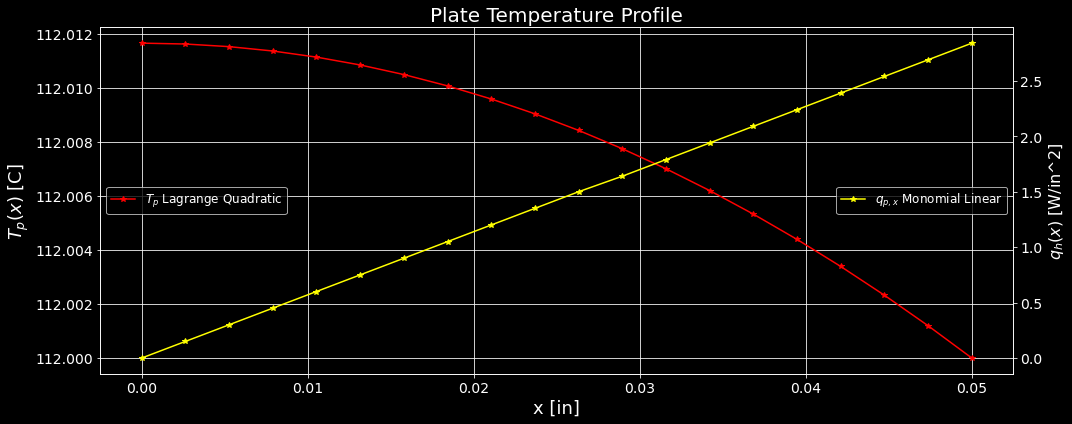

In [9]:
'''Show FEM Solution'''

import pandas as pd
df = pd.read_csv('output_omega_0002.csv')
    
plot_solution(df1=df, title='Plate Temperature Profile',
              u1_legend=r'$T_p$ Lagrange Quadratic',
              u1_flux_legend=r'$q_{p,x}$ Monomial Linear',
              xlabel='x [in]', y1label=r'$T_p(x)$ [C]', y2label=r'$q_h(x)$ [W/in^2]',)

#### [Test 2](#toc)<a id="1dsolofueldirichletrobin"></a>

In [10]:
'''Parameters'''

'Parameters'

In [11]:
'''Input file mod'''

'Input file mod'

In [12]:
'''Run MOOSE App'''

'Run MOOSE App'

In [13]:
'''Solution'''

'Solution'

## [2-D Results and Analysis](#toc)<a id="ranalysis"></a>

In [14]:
'''Parameters'''

'Parameters'

In [15]:
'''FEM Parameters'''

'FEM Parameters'

In [16]:
'''Input file mod'''

'Input file mod'

In [17]:
'''Run MOOSE App'''

'Run MOOSE App'

In [18]:
'''Show 2D solution'''

'Show 2D solution'

## [Conclusions](#toc)<a id="conclusions"></a>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [4] author, [reference]()